In [3]:
"""
============================================================
Variational coordinate descent for Mixture of Gaussians
============================================================

How to do Variational Bayes (VB) coordinate descent for GMM.

Here, we train a finite mixture of Gaussians with full covariances.

We'll consider a mixture model with a symmetric Dirichlet prior:

.. math::

    \pi \sim \mbox{Dir}(1/K, 1/K, \ldots 1/K)

as well as a standard conjugate prior on the mean and covariances, such that

.. math::

    \E[\mu_k] = 0

    \E[\Sigma_k] = 0.1 I_D

We will initialize the approximate variational posterior 
using K=10 randomly chosen examples ('randexamples' procedure),
and then perform coordinate descent updates
(alternating local step and global step) until convergence.
"""
import bnpy
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
# sphinx_gallery_thumbnail_number = 3

FIG_SIZE = (3, 3)
plt.rcParams['figure.figsize'] = FIG_SIZE

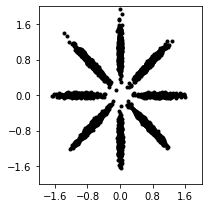

In [4]:
###############################################################################
# Read bnpy's built-in "AsteriskK8" dataset from file.

dataset_path = os.path.join(bnpy.DATASET_PATH, 'AsteriskK8')
dataset = bnpy.data.XData.read_npz(
    os.path.join(dataset_path, 'x_dataset.npz'))

###############################################################################
#
# Make a simple plot of the raw data

plt.plot(dataset.X[:, 0], dataset.X[:, 1], 'k.')
plt.gca().set_xlim([-2, 2])
plt.gca().set_ylim([-2, 2])
plt.tight_layout()
plt.show()

In [5]:
###############################################################################
#
# Training the model
# ------------------
# Let's do one single run of the VB algorithm.
# 
# Using 10 clusters and the 'randexamples' initializatio procedure.

trained_model, info_dict = bnpy.run(
    dataset, 'FiniteMixtureModel', 'Gauss', 'VB',
    output_path='/tmp/AsteriskK8/helloworld-K=10/',
    nLap=100,
    sF=0.1, ECovMat='eye',
    K=10,
    initname='randexamples')

Dataset Summary:
X Data
  num examples: 5000
  num dims: 2
Allocation Model:  Finite mixture model. Dir prior param 1.00
Obs. Data  Model:  Gaussian with full covariance.
Obs. Data  Prior:  Gauss-Wishart on mean and covar of each cluster
  E[  mean[k] ] = 
   [0. 0.] 
  E[ covar[k] ] = 
  [[0.1 0. ]
   [0.  0.1]]
Initialization:
  initname = randexamples
  K = 10 (number of clusters)
  seed = 1607680
  elapsed_time: 0.0 sec
Learn Alg: VB | task  1/1 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: /tmp/AsteriskK8/helloworld-K=10/1
        1/100 after      0 sec. |    145.5 MiB | K   10 | loss  6.582634775e-01 |  
        2/100 after      0 sec. |    145.5 MiB | K   10 | loss  4.350235353e-01 | Ndiff   68.926 
        3/100 after      0 sec. |    145.5 MiB | K   10 | loss  3.454096950e-01 | Ndiff  193.565 
        4/100 after      0 sec. |    145.5 MiB | K   10 | loss  3.049230819e-01 | Ndiff  175.237 
        5/100 after      0 sec. |    145.5 MiB | K   10 | loss  2.73

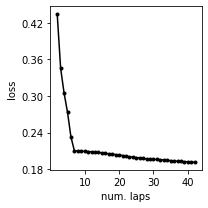

In [6]:
###############################################################################
# 
# Loss function trace plot
# ------------------------
# We can plot the value of the loss function over iterations,
# starting after the first full pass over the dataset (first lap).
#
# As expected, we see monotonic decrease in the loss function's score 
# after every subsequent iteration.
#
# Remember that the VB algorithm for GMMs is *guaranteed*
# to decrease this loss function after every step.
#
plt.plot(info_dict['lap_history'][1:], info_dict['loss_history'][1:], 'k.-')
plt.xlabel('num. laps')
plt.ylabel('loss')
plt.tight_layout()
plt.show()

SKIPPED 3 comps with size below 0.00


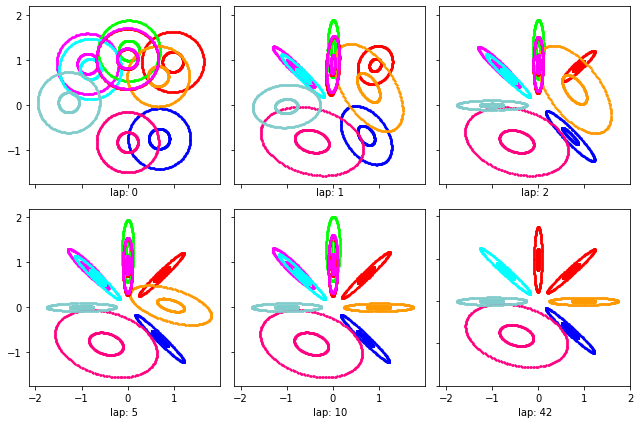

In [9]:
###############################################################################
#
# Visualization of learned clusters
# ---------------------------------
# Here's a short function to show the learned clusters over time.
def show_clusters_over_time(
        task_output_path=None,
        query_laps=[0, 1, 2, 5, 10, None],
        nrows=2):
    ''' Read model snapshots from provided folder and make visualizations

    Post Condition
    --------------
    New matplotlib plot with some nice pictures.
    '''
    ncols = int(np.ceil(len(query_laps) // float(nrows)))
    fig_handle, ax_handle_list = plt.subplots(
        figsize=(FIG_SIZE[0] * ncols, FIG_SIZE[1] * nrows),
        nrows=nrows, ncols=ncols, sharex=True, sharey=True)
    for plot_id, lap_val in enumerate(query_laps):
        cur_model, lap_val = bnpy.load_model_at_lap(task_output_path, lap_val)
        # Plot the current model
        cur_ax_handle = ax_handle_list.flatten()[plot_id]
        bnpy.viz.PlotComps.plotCompsFromHModel(
            cur_model, Data=dataset, ax_handle=cur_ax_handle)
        cur_ax_handle.set_xticks([-2, -1, 0, 1, 2])
        cur_ax_handle.set_yticks([-2, -1, 0, 1, 2])
        cur_ax_handle.set_xlabel("lap: %d" % lap_val)
    plt.tight_layout()
    plt.show()

###############################################################################
#
# Show the estimated clusters over time
show_clusters_over_time(info_dict['task_output_path'])